# Loading Up Data

First, we import the moddules we will be using and import our clean Data

In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import re

In [10]:
Clean_Sharks = pd.read_csv('data/Clean_Sharks.csv', encoding = 'latin-1')


We also drop the 'Unnamed: 0' column as we will not be using it for this excercise

In [9]:
Clean_Sharks.drop(['Unnamed: 0'], axis =1)

,Year,Age,Sex,Activity,Species,Country,Fatal_Y_N,Activity_Regex,Sex_Regex,age_regex,Species_regex
0,2018.0,57,F,Paddling,White shark,USA,N,paddling,f,57.0,White shark
1,2018.0,11,F,Standing,NaN,USA,N,standing,f,11.0,NaN
2,2018.0,48,M,Surfing,NaN,USA,N,surfing,m,48.0,NaN
3,2018.0,18,M,Swimming,Tiger shark,BRAZIL,Y,swimming,m,18.0,Tiger shark
4,2018.0,52,M,Fishing,"Lemon shark, 3'",USA,N,fishing,m,52.0,"lemon shark, 3'"
...,...,...,...,...,...,...,...,...,...,...,...
3294,0.0,16,M,Swimming in section of river used for washing ...,Bull shark,IRAQ,N,swimming,m,16.0,Bull shark
3295,0.0,50,M,"Shark fishing, knocked overboard",NaN,CUBA,Y,fishing,m,50.0,NaN
3296,0.0,13 or 14,M,Swimming,Bull shark,IRAQ,Y,swimming,m,13.0,Bull shark
3297,0.0,16,M,Standing,12' tiger shark,BELIZE,Y,standing,m,16.0,Tiger shark


# Lets visualize some data

### H1 = Most shark attacks happened to male surfers below the age of 40

to answer this hypothesis we will need to work with the activity, age, and sex columns.

### H2 = Most shark attacks where caused by great white sharks
to answer this hypothesis we will need to work with Species column

### H3 = Shark Attacks are correlated to an increase in sea temperatures
to answer this hypothesis we will need to bring in another data set into the mix and find out if there is any correlation between climate change and shark attacks

# Do Most Shark Attacks Happen to Male Surfers?

To answer the first hypothesis, we need to find what the activity most prone to shark attacks is. To do this we will plot the count of activities mentioned in the data during a shark attack. 

In [88]:
Activities = Clean_Sharks['Activity_Regex']
Activities.value_counts()

surfing                                                                                                             871
swimming                                                                                                            715
spearfishing                                                                                                        277
fishing                                                                                                             235
wading                                                                                                              134
                                                                                                                   ... 
diving for shells, saw shark circling wife near the surface, intercepted shark & it pulled him beneath the water      1
floating on his back in an inner tube                                                                                 1
transatlantic rowing                    

We create an index of the top 10 most frequently reported activities to order our countplot

In [21]:
index10 = Activities.value_counts().head(10).index
index10

Index(['surfing', 'swimming', 'spearfishing', 'fishing', 'wading', 'standing',
       'scuba diving', 'snorkeling', 'bathing', 'body boarding'],
      dtype='object')

After, we pass the string values in the age_regex column to numeric values by using the method, to_numeric()

In [18]:
age_numeric = pd.to_numeric(Clean_Sharks['age_regex'])

### Graphing  H1
Now we create a to figured axs to try and answer the first hypothesis

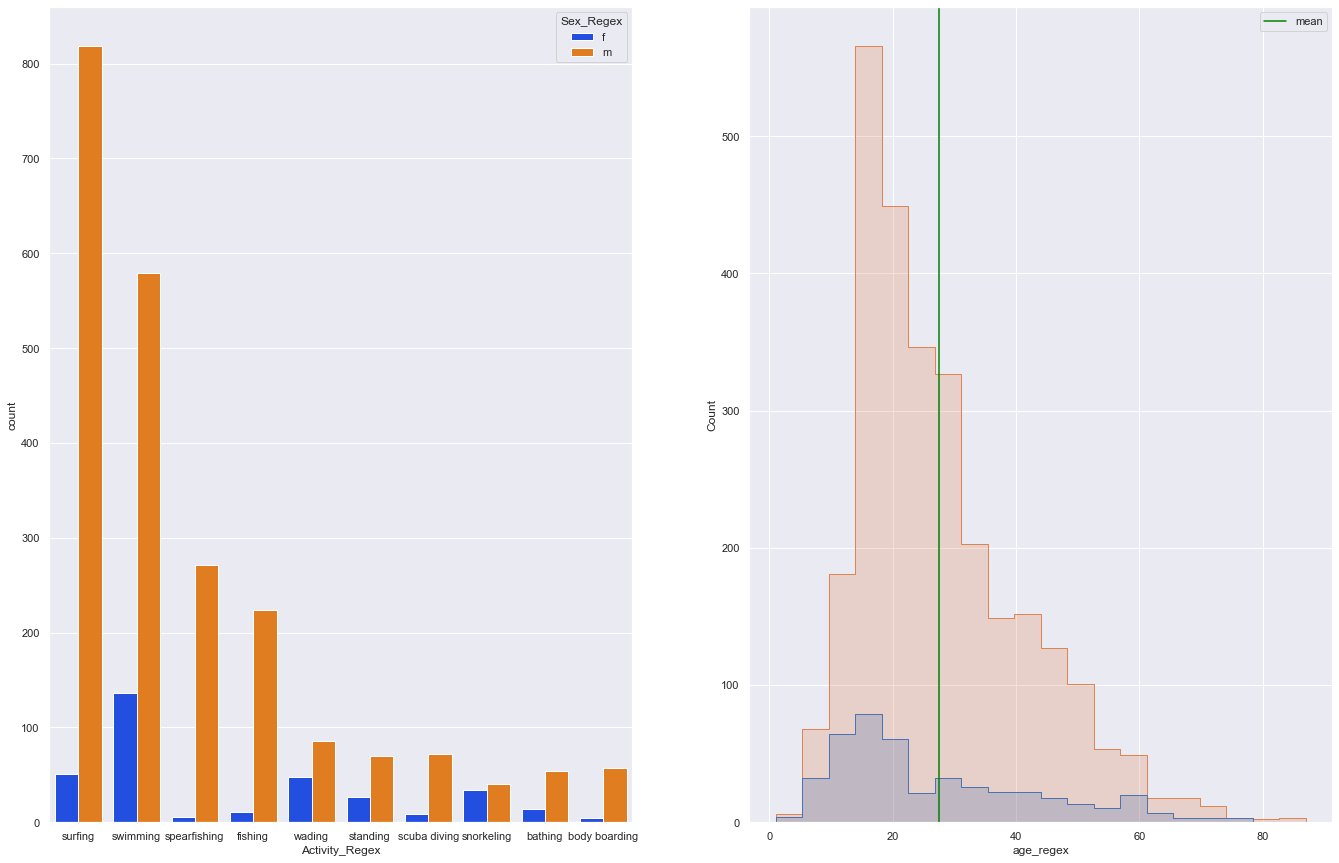

In [85]:
fig, axs = plt.subplots(nrows= 1, ncols=2, figsize=(23, 15))

sns.set(style='darkgrid')

sns.countplot( x = Activities , hue = Clean_Sharks['Sex_Regex'], order = index10, 
              ax=axs[0], palette = 'bright')

sns.histplot(x = age_numeric, hue = Clean_Sharks['Sex_Regex'],  ax=axs[1], bins = 20, element="step")
axs[1].axvline(age_numeric.mean(), c = 'Green', label = 'mean')
axs[1].legend('')
plt.legend()
plt.show()

## Conlusions

In [35]:
round(age_numeric.mean())

28

### Male Surfers where the most attacked subgroup 

### The mean age of the shark attack population was 28 years old, 


# Are most shark attacks perpetrated by White Sharks?

In [70]:
Species = Clean_Sharks.Species_regex
Species
Index_Species = Species.value_counts().head(10).index

<AxesSubplot:xlabel='Species_regex', ylabel='count'>

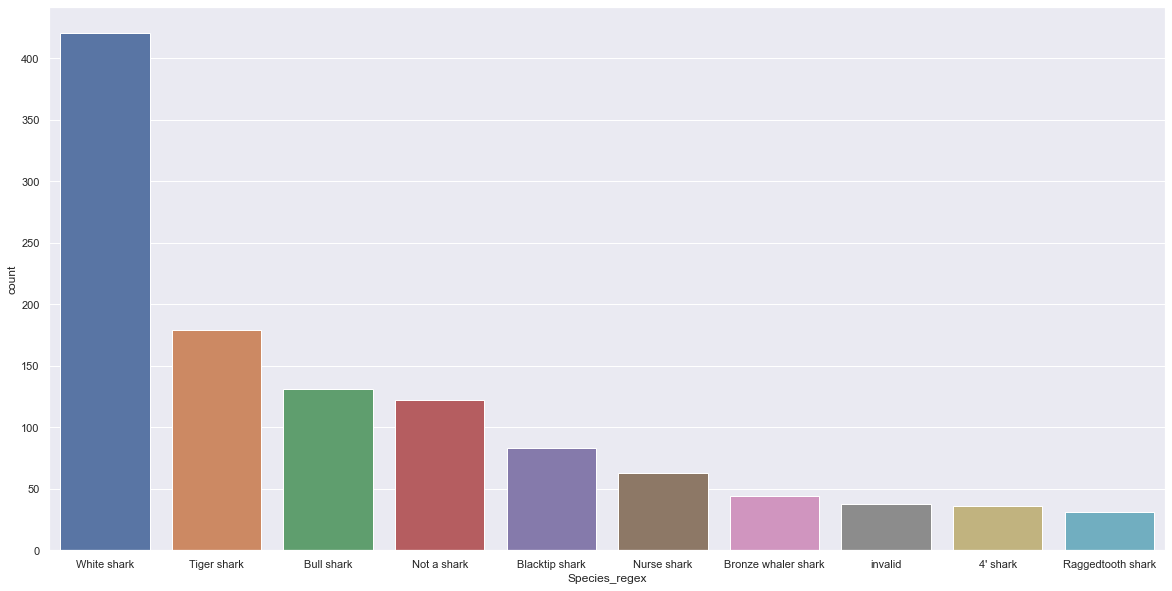

In [75]:
ax, fig = plt.subplots(nrows= 1, ncols=1, figsize=(20, 10))
sns.countplot(x= Species, order = Index_Species)



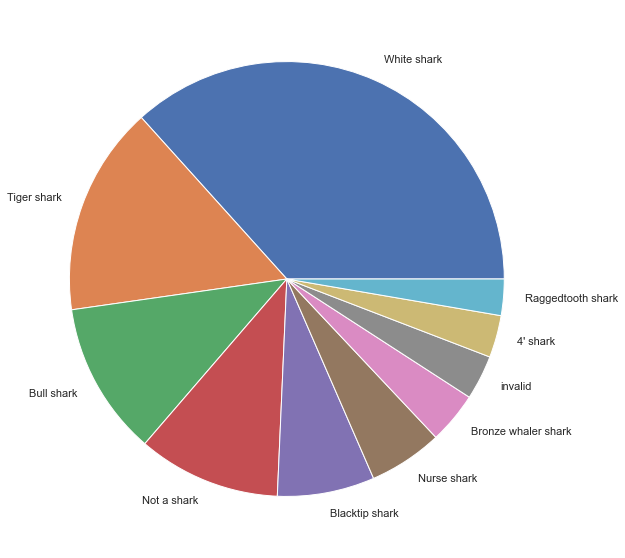

In [76]:
ax, fig = plt.subplots(nrows= 1, ncols=1, figsize=(20, 10))
plt.pie(Species.value_counts().head(10), labels = Species.value_counts().head(10).index )
plt.show()